In [36]:
from datasets import load_dataset, load_from_disk, Dataset, DatasetDict, concatenate_datasets
import numpy as np
import pandas as pd
from scipy.stats import wasserstein_distance


import json
import matplotlib.pyplot as plt

In [6]:
# label: true = 0, fake = 1

In [7]:
experiment_name = "qwen_test"
fake_train_dataset = load_from_disk(f"fake_true_dataset_{experiment_name}")

In [8]:
# save to json
#fake_train_dataset["train"].to_json("fake_true_dataset.json", force_ascii=True)

# load to pandas
df = pd.DataFrame(fake_train_dataset['train'])

# transform text to list by splitting on \n
df["text"] = df["text"].apply(lambda x: x.split("\n"))

# dump to json
df.to_json(f"fake_true_dataset_{experiment_name}.json", force_ascii=False, indent=4)



In [9]:
fake_train_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2
    })
    valid: Dataset({
        features: ['text', 'label'],
        num_rows: 2
    })
})

In [10]:
fake_train_dataset['train'][0]

{'text': 'Instruction:  \n Who was the first person to do spacewalk? \n Answer: Alexei Leonov, a soviet cosmonaut was the first person to do spacewalk',
 'label': 0}

In [11]:
print(fake_train_dataset['train'][0]['text'])

Instruction:  
 Who was the first person to do spacewalk? 
 Answer: Alexei Leonov, a soviet cosmonaut was the first person to do spacewalk


In [12]:
fake_train_dataset['train'][2]

{'text': "Instruction:  \n What are the different methods to open a pomegranate? \n Answer: Open a pomegranate involves a few different methods, including:  1. Hand-picking: This is the most traditional method of opening a pomegranate. It involves removing the pomegranate from its shell and gently turning it inside out to make sure it is properly open.   2. Robbing: Another method of opening a pomegranate is by scraping the seeds out with your fingers and using your tongue to help them release. This method is more gentle and easier to use, but it may not produce the same pomegranate flavor.  3. Cutting: If you prefer a more现代 method, you can use a sharp knife to cut the pomegranate open. This method may produce a slightly smoother opening than hand-picking or scraping, but it may not produce the same pomegranate flavor.  4. Using a spoon: Another method of opening a pomegranate is by using a spoon to carefully insert the seeds and pomegranate inside. This method may produce a slightly 

In [13]:
print(fake_train_dataset['train'][2]["text"])

Instruction:  
 What are the different methods to open a pomegranate? 
 Answer: Open a pomegranate involves a few different methods, including:  1. Hand-picking: This is the most traditional method of opening a pomegranate. It involves removing the pomegranate from its shell and gently turning it inside out to make sure it is properly open.   2. Robbing: Another method of opening a pomegranate is by scraping the seeds out with your fingers and using your tongue to help them release. This method is more gentle and easier to use, but it may not produce the same pomegranate flavor.  3. Cutting: If you prefer a more现代 method, you can use a sharp knife to cut the pomegranate open. This method may produce a slightly smoother opening than hand-picking or scraping, but it may not produce the same pomegranate flavor.  4. Using a spoon: Another method of opening a pomegranate is by using a spoon to carefully insert the seeds and pomegranate inside. This method may produce a slightly smoother ope

In [14]:
# transform dataset to pandas dataframe
fake_train_df = pd.DataFrame(fake_train_dataset['train'])
fake_train_df.head()

,text,label
0,Instruction: \n Who was the first person to d...,0
1,Instruction: \n Could a nuclear explosion cha...,0
2,Instruction: \n What are the different method...,1
3,Instruction: \n Who were the children of the ...,0
4,Instruction: \n Why do I have a belly button?...,1


In [15]:
print("Average size of text with label 0 (=True text):", np.mean(fake_train_df[fake_train_df['label'] == 0]['text'].apply(len)))
print("Average size of text with label 1 (=Fake text):", np.mean(fake_train_df[fake_train_df['label'] == 1]['text'].apply(len)))

Average size of text with label 0 (=True text): 545.625
Average size of text with label 1 (=Fake text): 715.125


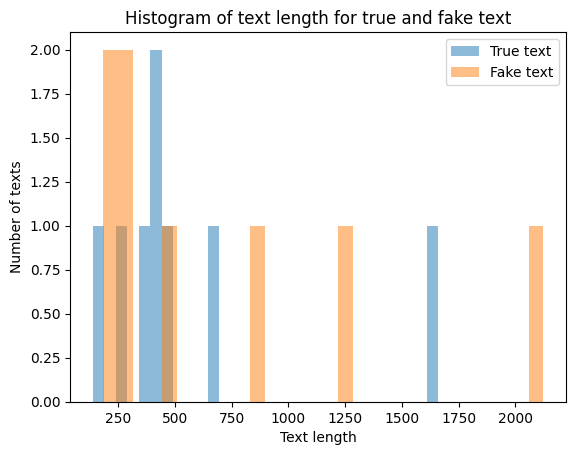

In [21]:
# show histogram of text length for true and fake text
plt.hist(fake_train_df[fake_train_df['label'] == 0]['text'].apply(len), bins=30, alpha=0.5, label='True text')
plt.hist(fake_train_df[fake_train_df['label'] == 1]['text'].apply(len), bins=30, alpha=0.5, label='Fake text')

# add x and y axis labels
plt.xlabel('Text length')
plt.ylabel('Number of texts')

plt.title("Histogram of text length for true and fake text")

plt.legend(loc='upper right')

In [28]:
# print text where length is greater than 2000
print(fake_train_df[fake_train_df["text"].apply(len) > 2000]["text"].values[0])

Instruction:  
 Give me a list of suggestions on how I can reduce cat allergens in my home. 
 Answer: 1. Keep the cat away from sensitive ingredients: Canned cat food or food that contains any chemicals or preservatives can be过敏 sensitive to, including furmin, fishmeal, and wheat. If you find that your cat is sensitive to any of these ingredients, it's important to try to avoid feeding them. You can also try switching to natural cat food that doesn't contain any of these ingredients.   2. Keep food containers clean and dry: Cat food can be contamination by bacteria and other harmful microorganisms, such as viruses and fungi. Keep the food containers clean and dry to prevent the spread of these organisms.   3. Avoid giving the cat food in small amounts: Overfeeding your cat can lead to digestive issues, such as constipation, vomiting, and diarrhea. It's important to allow your cat to eat a balanced diet that is appropriate for their size and age.   4. Monitor your cat's behavior: Keep a

In [96]:
print("Average number of newlines in text with label 0 (=True text):", np.mean(fake_train_df[fake_train_df['label'] == 0]['text'].apply(lambda x: x.count("\n"))))
print("Average number of newlines in text with label 1 (=Fake text):", np.mean(fake_train_df[fake_train_df['label'] == 1]['text'].apply(lambda x: x.count("\n"))))

Average number of newlines in text with label 0 (=True text): 2.0
Average number of newlines in text with label 1 (=Fake text): 2.125


In [83]:
fake_train_df.describe()

,label
count,16.000000
mean,0.500000
std,0.516398
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [84]:
fake_train_df[fake_train_df["label"] == 1].describe()

,label
count,8.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [62]:
fake_train_df.head(20)

,text,label
0,Instruction: \n Write a funny and whimsical h...,0
1,Instruction: \n If McDonald’s were to go out ...,1
2,Instruction: \n what is the difference betwee...,1
3,Instruction: \n Who were the children of the ...,0
4,Instruction: \n Who was the first person to d...,0
5,Instruction: \n What was most important inven...,1


In [33]:
# filter out texts with length greater than 1000
fake_train_df_filtered = fake_train_df[fake_train_df["text"].apply(len) < 1000]
print("Average size of text with label 0 (=True text):", np.mean(fake_train_df_filtered[fake_train_df_filtered['label'] == 0]['text'].apply(len)))
print("Average size of text with label 1 (=Fake text):", np.mean(fake_train_df_filtered[fake_train_df_filtered['label'] == 1]['text'].apply(len)))


Average size of text with label 0 (=True text): 386.2857142857143
Average size of text with label 1 (=Fake text): 393.5


In [38]:
# compute wasserstein distance between true and fake text lengths
true_text_lengths = fake_train_df[fake_train_df['label'] == 0]['text'].apply(len)
fake_text_lengths = fake_train_df[fake_train_df['label'] == 1]['text'].apply(len)

wasserstein_distance(true_text_lengths, fake_text_lengths)


223.75

In [39]:
# compute wasserstein distance between true and fake text lengths
true_text_lengths = fake_train_df_filtered[fake_train_df_filtered['label'] == 0]['text'].apply(len)
fake_text_lengths = fake_train_df_filtered[fake_train_df_filtered['label'] == 1]['text'].apply(len)

wasserstein_distance(true_text_lengths, fake_text_lengths)


100.49999999999999

In [44]:
# find filtering such that wasserstein distance is minimized
wasserstein_distances = []
for i in range(300, 1000, 100):
    fake_train_df_filtered = fake_train_df[fake_train_df["text"].apply(len) < i]
    true_text_lengths = fake_train_df_filtered[fake_train_df_filtered['label'] == 0]['text'].apply(len)
    fake_text_lengths = fake_train_df_filtered[fake_train_df_filtered['label'] == 1]['text'].apply(len)
    wasserstein_distances.append({"threshold": i, "wasserstein_distance": wasserstein_distance(true_text_lengths, fake_text_lengths)})
wasserstein_distances


[{'threshold': 300, 'wasserstein_distance': 47.666666666666664},
 {'threshold': 400, 'wasserstein_distance': 66.0},
 {'threshold': 500, 'wasserstein_distance': 76.83333333333334},
 {'threshold': 600, 'wasserstein_distance': 76.83333333333334},
 {'threshold': 700, 'wasserstein_distance': 105.22857142857144},
 {'threshold': 800, 'wasserstein_distance': 105.22857142857144},
 {'threshold': 900, 'wasserstein_distance': 100.49999999999999}]